In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

In [2]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
# h.load_file("L5PCbiophysWhat.hoc")
h.load_file("L5PCbiophys5c.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37

845.34678 
845.34678 


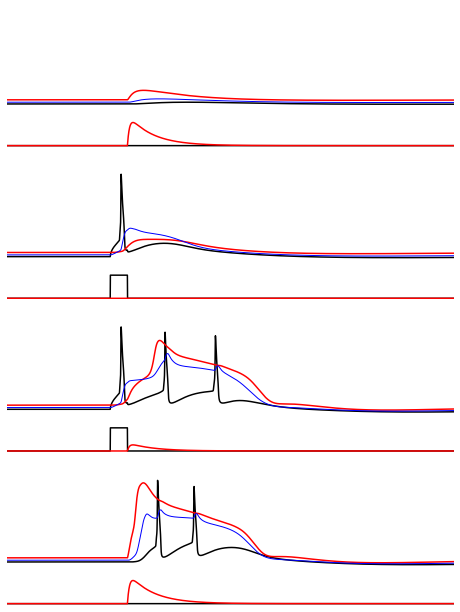

In [3]:
def Larkum_Figure_1():
    """figure 1 of Larkum 1999, showing non-linearity"""
    plt.rcParams['figure.figsize'] = [8,11]      
    f, (ax0, ax01, ax1, ax11, ax2, ax21, ax3, ax31) = \
        plt.subplots(8, gridspec_kw={'height_ratios': [4, 1, 4, 1, 4, 1, 4, 1]})

    for dend_syn_imax, soma_cur, top_ax, bot_ax in [(0.5, False, ax0, ax01),
                                                    (0, True, ax1, ax11),
                                                    (0.5, True, ax2, ax21),
                                                    (2, False, ax3, ax31)]:

        t = h.Vector().record(h._ref_t)
        som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
        distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
        proximal_v = h.Vector().record(L5PC.apic[20](0.5)._ref_v)

        current_epsp = h.epsp(L5PC.apic[36](0.9))
        current_epsp.tau0 = 0.6
        current_epsp.tau1 = 7
        current_epsp.imax = dend_syn_imax
        current_epsp.onset = 505
        
        current_som = h.IClamp(L5PC.soma[0](0.5))
        current_som.delay = 500
        current_som.dur = 5 if soma_cur else 0
        current_som.amp = 1.9

        soma_cur = h.Vector().record(current_som._ref_i)
        cur_i = h.Vector().record(current_epsp._ref_i)

        v_rest = -80.28

        h.finitialize(v_rest*mV)
        h.continuerun(600*ms)

        top_ax.plot(t, som_v, 'k', linewidth=1.5, label='soma')
        top_ax.plot(t, distal_v, 'r', linewidth=1.5, label='distal dend')
        top_ax.plot(t, proximal_v, 'b', linewidth=1, label='proximal dend')
        top_ax.set(ylim=(-85,60), xlim=(470,600))
        top_ax.get_xaxis().set_ticks([])
        top_ax.get_yaxis().set_ticks([])
        top_ax.spines['top'].set_visible(False)
        top_ax.spines['right'].set_visible(False)
        top_ax.spines['bottom'].set_visible(False)
        top_ax.spines['left'].set_visible(False)
        # top_ax.legend()

        bot_ax.plot(t, soma_cur, 'k', label='soma')
        bot_ax.plot(t, -1*cur_i, 'r', label='dend')
        bot_ax.set( xlim=(470,600))
        bot_ax.get_xaxis().set_ticks([])
        bot_ax.get_yaxis().set_ticks([])
        bot_ax.spines['top'].set_visible(False)
        bot_ax.spines['right'].set_visible(False)
        bot_ax.spines['bottom'].set_visible(False)
        bot_ax.spines['left'].set_visible(False)
        #top_ax.axhline(y=v_rest, color='k', linestyle=':', linewidth=1)
    
    plt.show()
    

Larkum_Figure_1()
